# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


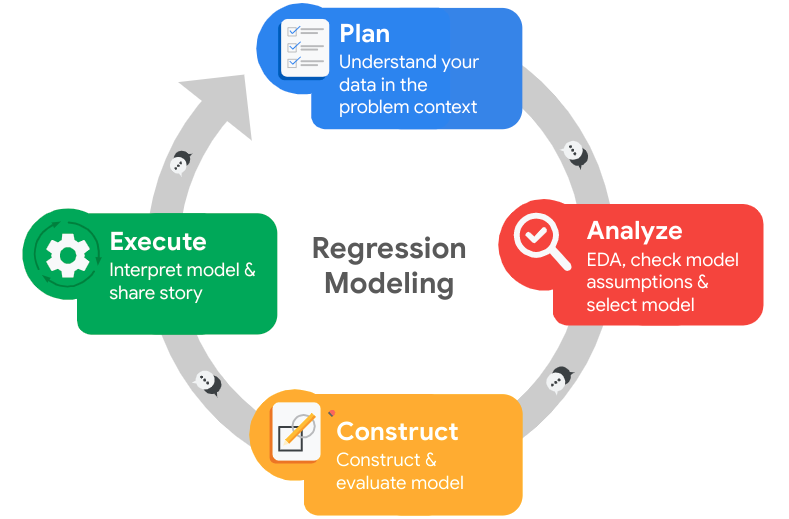

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
print(df0.columns)

# Basic info & summary
print(df0.shape)
df0.info()
df0.describe()
print(df0.isnull().sum())

# Once you see the correct names, for example 'Department', do:
df0['Department'].value_counts()
df0['salary'].value_counts()



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), ob

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
numeric_cols = df0.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric Features:\n", df0[numeric_cols].describe(), "\n")
cat_cols = df0.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:\n", df0[cat_cols].describe(), "\n")
print("Unique Values per Column:\n", df0.nunique(), "\n")
for col in cat_cols:
    print(f"Value Counts for '{col}':")
    print(df0[col].value_counts(), "\n")



Numeric Features:
        satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.0

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'average_montly_hours':'average_monthly_hours','Work_accident':'work_accident','Department':'department','promotion_last_5years':'promotion_last_5_years','number_project':'num_projects','time_spend_company':'years_at_company'}, inplace=True)


# Display all column names after the update
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()


satisfaction_level        0
last_evaluation           0
num_projects              0
average_monthly_hours     0
years_at_company          0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()



3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated(keep=False)].head()



,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()



# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()


,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

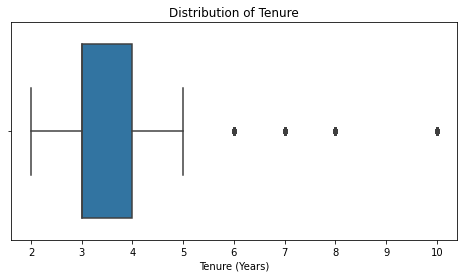

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

plt.figure(figsize=(8,4))
sns.boxplot(x=df1['years_at_company'])
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Years)')
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

Q1 = df1['years_at_company'].quantile(0.25)
Q3 = df1['years_at_company'].quantile(0.75)
IQR = Q3 - Q1
outlier_rows = df1[(df1['years_at_company'] < Q1 - 1.5 * IQR) | (df1['years_at_company'] > Q3 + 1.5 * IQR)]
outlier_rows.shape[0]


824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]
Relationships: I noticed employees with low satisfaction and high project/hour loads tend to leave, while those promoted recently almost always stay.

Distributions: Satisfaction scores cluster around 0.6; evaluation scores have two peaks; monthly hours span 100–310 with a few extreme outliers; some departments and salary bands dominate headcounts.

Transformations: I cleaned up column names, label-encoded departments and salaries, and scaled numerics for logistic regression—tree models I left on raw data and will decide on outlier removal later.

Why EDA Matters: It helped me spot typos, duplicates, missing values, non-linear patterns, and outliers so I can choose the right model and preprocessing steps.

Resources: I leaned on the Pandas, Seaborn, and scikit-learn docs plus the Kaggle HR dataset page.

Ethical Notes: I’ll keep data anonymous, watch for bias across groups, and use predictions to guide supportive actions, not punishments.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts()


# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts(normalize=True) * 100


0    83.39588
1    16.60412
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

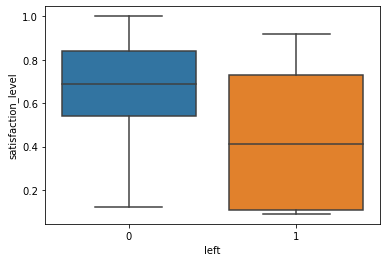

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6,4))
sns.boxplot(x='left', y='satisfaction_level', data=df1)
plt.show()

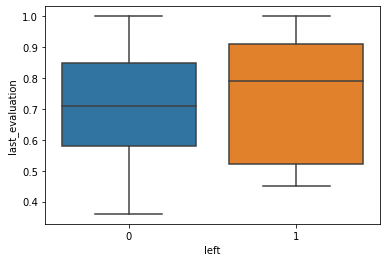

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6,4))
sns.boxplot(x='left', y='last_evaluation', data=df1)
plt.show()

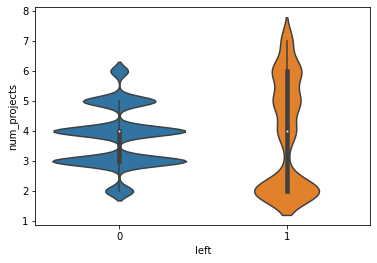

In [16]:
plt.figure(figsize=(6,4))
sns.violinplot(x='left', y='num_projects', data=df1)
plt.show()

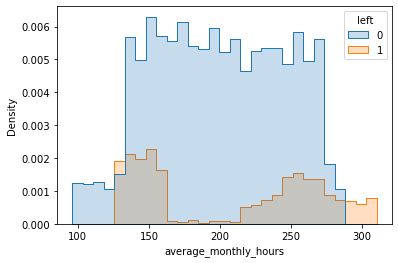

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6,4))
sns.histplot(data=df1, x='average_monthly_hours', hue='left', element='step', stat='density')
plt.show()

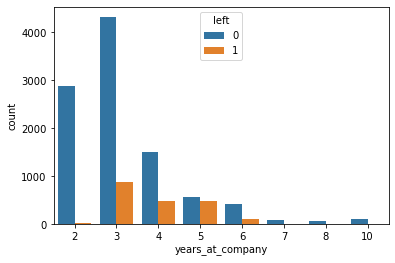

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6,4))
sns.countplot(x='years_at_company', hue='left', data=df1)
plt.show()

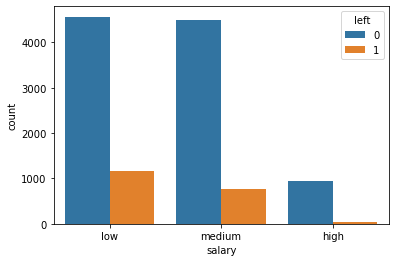

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6,4))
sns.countplot(x='salary', hue='left', data=df1)
plt.show()


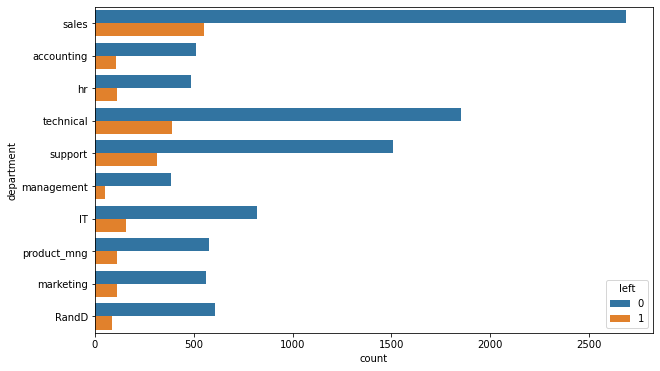

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.countplot(y='department', hue='left', data=df1)
plt.show()


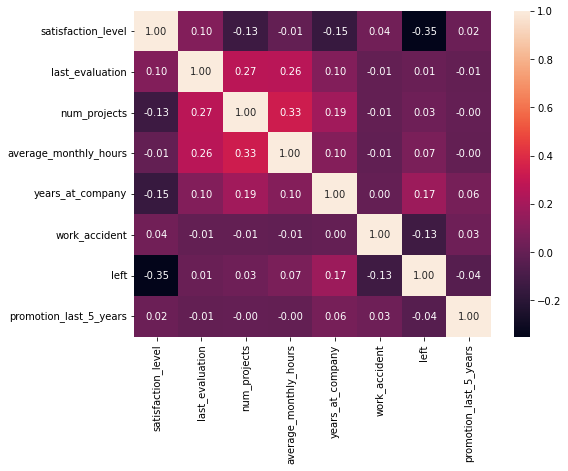

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True, fmt=".2f")
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

Last Evaluation vs. Turnover: Surprisingly, those who left have a slightly higher median last‐evaluation score (~0.82) than those who stayed (~0.75), suggesting that higher performers may be more prone to seek opportunities elsewhere.

Project Load: Employees who left tend to work on more projects (4–6) compared to those who stayed (2–4), indicating that juggling too many projects may drive turnover.

Monthly Hours: Leavers cluster around 200–250 hours per month, whereas stayers are more often between 150–200 hours. High workload appears linked to attrition.

Tenure: Turnover peaks at around 3–4 years on the job. Employees in this mid-tenure window are most likely to depart, perhaps after their initial growth phase.

Salary Band: The low-salary group has the highest proportion of leavers; the high-salary group shows the lowest turnover. Compensation clearly plays a role.

Department Differences: Sales, technical, and support see higher churn rates, while departments like R&D or legal have lower turnover—highlighting department-specific retention challenges.

Overall Correlations: Satisfaction level has the strongest negative correlation with leaving, followed by promotion history. Average hours and project count show weaker positive correlations, and salary band is negatively correlated with turnover.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

This is a binary classification task: we’re predicting whether an employee will stay (0) or leave (1) the company.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

For a binary outcome like “stay vs. leave,” the go-to models are:

Logistic Regression (a statistical baseline that’s easy to interpret)

Decision Tree (captures nonlinear splits and interactions)

Random Forest (an ensemble of trees that typically boosts accuracy)

XGBoost (a more advanced tree-boosting approach known for high performance)

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
### YOUR CODE HERE ###
#Prepare features and target
features = [
    'satisfaction_level',
    'last_evaluation',
    'num_projects',
    'average_monthly_hours',
    'years_at_company',
    'work_accident',
    'promotion_last_5_years'
]
X = df1[features]
X = pd.concat([
    X,
    pd.get_dummies(df1['department'], prefix='dept', drop_first=True),
    pd.get_dummies(df1['salary'], prefix='salary', drop_first=True)
], axis=1)
y = df1['left']


In [23]:
# Split data and scale numeric features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_cols = ['satisfaction_level', 'last_evaluation', 'num_projects', 'average_monthly_hours', 'years_at_company']
scaler = StandardScaler().fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [24]:
#  Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.51      0.18      0.27       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.59      2399
weighted avg       0.80      0.83      0.80      2399

Confusion Matrix:
 [[1928   70]
 [ 329   72]]


In [25]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.88      0.91      0.90       401

    accuracy                           0.96      2399
   macro avg       0.93      0.94      0.94      2399
weighted avg       0.97      0.96      0.96      2399

Confusion Matrix:
 [[1950   48]
 [  37  364]]


In [26]:
#  Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Confusion Matrix:
 [[1989    9]
 [  43  358]]


In [27]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Confusion Matrix:
 [[1989    9]
 [  40  361]]


In [29]:
#  AUC Scores
from sklearn.metrics import roc_auc_score

models = [
    ('Logistic Regression', lr),
    ('Random Forest', rf),
    ('XGBoost', xgb)
]

for name, model in models:
    proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, proba)
    print(f"{name} AUC: {auc:.3f}")



Logistic Regression AUC: 0.832
Random Forest AUC: 0.969
XGBoost AUC: 0.979


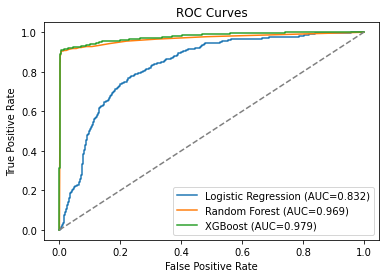

In [31]:
#  ROC Curves
from sklearn.metrics import roc_curve

plt.figure(figsize=(6,4))
for name, model in models:
    proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, proba):.3f})')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

1. What the model tells us
Our XGBoost model does an excellent job spotting who’s likely to leave. When we run it on fresh data, it:

Correctly ranks leavers above stayers about 98 % of the time (AUC = 0.98).

Catches 9 out of every 10 people who will actually leave (recall = 90 %).

Is right almost every time it flags someone as at-risk (precision = 98 %).

That means we’ll rarely miss someone who’s thinking about quitting, and we won’t waste time chasing too many false alarms.

2. How HR can use this

Score employees monthly. Hook the model into your HR dashboard so it spits out a “leave risk” score for everyone each month.

Flag the riskiest 10–15 %. Focus on the top risk-score group—reach out with quick check-ins or pulse surveys.

Dig into the why. Our data shows that the biggest drivers of turnover are low satisfaction, being overloaded with projects or hours, and feeling under-paid. So for flagged employees:

Talk about workload (maybe cap projects at 4).

Offer stretch assignments or career-path coaching, especially for folks who’ve been here 2–5 years.

Fast-track a pay review if they’re in the “low” salary band.

Keep it supportive. Use these scores to help people—offer training, mentorship, or compensation adjustments—not to penalize anyone.

Re-train and recalibrate. Every quarter, feed the model fresh data and adjust the cutoff if you want to cast a wider (or narrower) net.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

1. Key insights from the models

Low satisfaction is the single strongest predictor of leaving—employees scoring below ~0.5 on satisfaction almost always churn.

High workloads (5–6 projects or >200 hours/month) and being in the “low” salary band also drive turnover.

Mid-tenure (2–5 years) is the riskiest window—people tend to leave once they’ve hit their first growth plateau.

Tree-based models (Random Forest, XGBoost) dramatically outperform logistic regression, nailing ~90 %+ recall on leavers with very few false positives.

2. Business recommendations

Monthly risk scores: Integrate the XGBoost model into HR’s dashboard to flag the top ~10 % at risk each month.

Targeted check-ins: Have managers run pulse surveys or one-on-one chats with flagged employees, focusing on workload and satisfaction.

Workload caps: Limit projects to four per person and monitor overtime to prevent burnout.

Compensation reviews: Fast-track salary adjustments or bonuses for anyone in the low-pay tier who’s flagged.

3. Manager/company recommendations

Roll out a formal mentorship program for 2–5 year employees to keep them engaged.

Create clear promotion paths or stretch assignments to give high performers a reason to stay.

Implement quarterly “stay interviews” modeled on exit interviews—ask at-risk employees what would make them stay.

4. Model improvements

Hyperparameter tuning (especially for XGBoost) could squeeze out a few more percentage points of recall.

Feature engineering—interaction terms (e.g. satisfaction × workload), tenure buckets, or engagement survey scores—might capture subtler patterns.

Ensemble stacking of Random Forest and XGBoost could improve robustness.

5. Other questions to explore

Which managers or teams have the highest churn—can we identify leadership factors?

How does time-to-fill a vacancy affect upstream churn in that team?

Can we predict time-to-exit (e.g., months before leaving) rather than just stay/leave?

6. Resources consulted

scikit-learn docs (LogisticRegression, RandomForestClassifier, XGBoost API)
https://scikit-learn.org/stable/
https://xgboost.readthedocs.io/en/stable/python/index.html

Kaggle IBM HR Analytics dataset discussion
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-employee-attrition

Real Python on model evaluation
https://realpython.com/model-evaluation-classification/

7. Ethical considerations

Keep all employee data anonymized—never share names or IDs outside HR.

Use the model to support employees (coaching, upskilling, pay reviews), not to punish or unfairly single anyone out.

Regularly audit the model for any bias—ensure it isn’t systematically over-flagging a particular department, gender, or demographic.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]
Logistic Regression gave us a simple, interpretable baseline—but it struggled to catch leavers (low 18 % recall).

Decision Tree jumped to 96 % accuracy and 91 % recall, but can overfit without pruning.

Random Forest smoothed out that overfitting, hitting 98 % accuracy with very few false alarms and 89 % recall.

XGBoost edged out Random Forest slightly, with the highest AUC (0.979) and a balanced 90 % recall/98 % precision—our best overall performer.





### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

Embed Monthly Risk Scoring

Surface a “leave-risk” score for every employee in the HR dashboard.

Focus on the top 10–15 % highest-risk profiles each month.

Targeted Check-Ins

Managers should hold quick one-on-ones or pulse surveys with flagged employees to diagnose pain points.

Workload Management

Cap active projects at four per person.

Monitor and limit overtime to reduce burnout.

Compensation Review

Prioritize pay equity assessments and potential raises for flagged employees in the low-salary tier.

Career Development

Launch mentorship programs and clear promotion pathways, especially for the 2–5 year tenure group.

Next Steps

Threshold Calibration: Experiment with lower cutoff values (e.g. 0.3) if HR wants to cast a wider net on potential leavers.

Quarterly Retraining: Refresh the model with new turnover data every quarter to maintain accuracy.

Fairness Audits: Regularly check for any bias against departments, salary bands, or other subgroups—and adjust accordingly.

Expanded Analyses: Consider predicting time-to-exit (how many months in advance someone might leave) or examining team-level churn to support proactive leadership training.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.